In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



In [61]:
df1= pd.read_csv("EV_Data  (1) (1).csv")
df2=pd.read_csv("data1 (1).csv")

In [62]:
df1=df1.drop(columns=['Unnamed: 0'])


In [63]:
df1.head()

,Age,City,Profession,Marital Status,Education,No. of Family members,Annual Income,Would you prefer replacing all your vehicles to Electronic vehicles?,If Yes/Maybe what type of EV would you prefer?,Do you think Electronic Vehicles are economical?,Which brand of vehicle do you currently own?,How much money could you spend on an Electronic vehicle?,Preference for wheels in EV,Do you think Electronic vehicles will replace fuel cars in India?
0,30,Nabha,NaN,Single,Graduate,5,1.193876e+06,Maybe,SUV,Yes,Hyundai,<5 lakhs,2,I don't think so
1,27,Pune,NaN,Single,Graduate,4,1.844540e+06,Yes,SUV,Yes,Honda,<15 lakhs,4,"Yes, in <20years"
2,32,Kashipur,NaN,Single,Graduate,4,2.948150e+06,Yes,Hatchback,Yes,KIA,<15 lakhs,4,"Yes, in <20years"
3,55,Pune,Business,Single,Graduate,3,2.832380e+06,Maybe,Hatchback,No,Hyundai,<5 lakhs,4,"Yes, in <10 years"
4,26,Satara,NaN,Single,Graduate,4,2.638751e+06,Yes,Sedan,Yes,McLaren,<15 lakhs,4,"Yes, in <20years"


In [64]:
df2.head() 

,Sl. No,State,Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules,Two Wheelers (Category L2 (CMVR)),Two Wheelers (Max power not exceeding 250 Watts),Three Wheelers (Category L5 slow speed as per CMVR),Three Wheelers (Category L5 as per CMVR),Passenger Cars (Category M1 as per CMVR),Buses,Total in state
0,1,Meghalaya,0,0,0,0,0,6,0,6
1,2,Nagaland,0,20,3,0,0,1,0,24
2,3,Manipur,16,8,11,0,5,12,0,52
3,4,Tripura,28,9,36,0,0,8,0,81
4,5,Andaman & Nicobar islands,0,0,0,0,0,82,0,82


In [65]:
df1.dropna(inplace = True)
df2.dropna(inplace = True)

In [66]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 540 entries, 3 to 999
Data columns (total 14 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   Age                                                                   540 non-null    int64  
 1   City                                                                  540 non-null    object 
 2   Profession                                                            540 non-null    object 
 3   Marital Status                                                        540 non-null    object 
 4   Education                                                             540 non-null    object 
 5   No. of Family members                                                 540 non-null    int64  
 6   Annual Income                                                         540 non-null    float64
 7   Woul

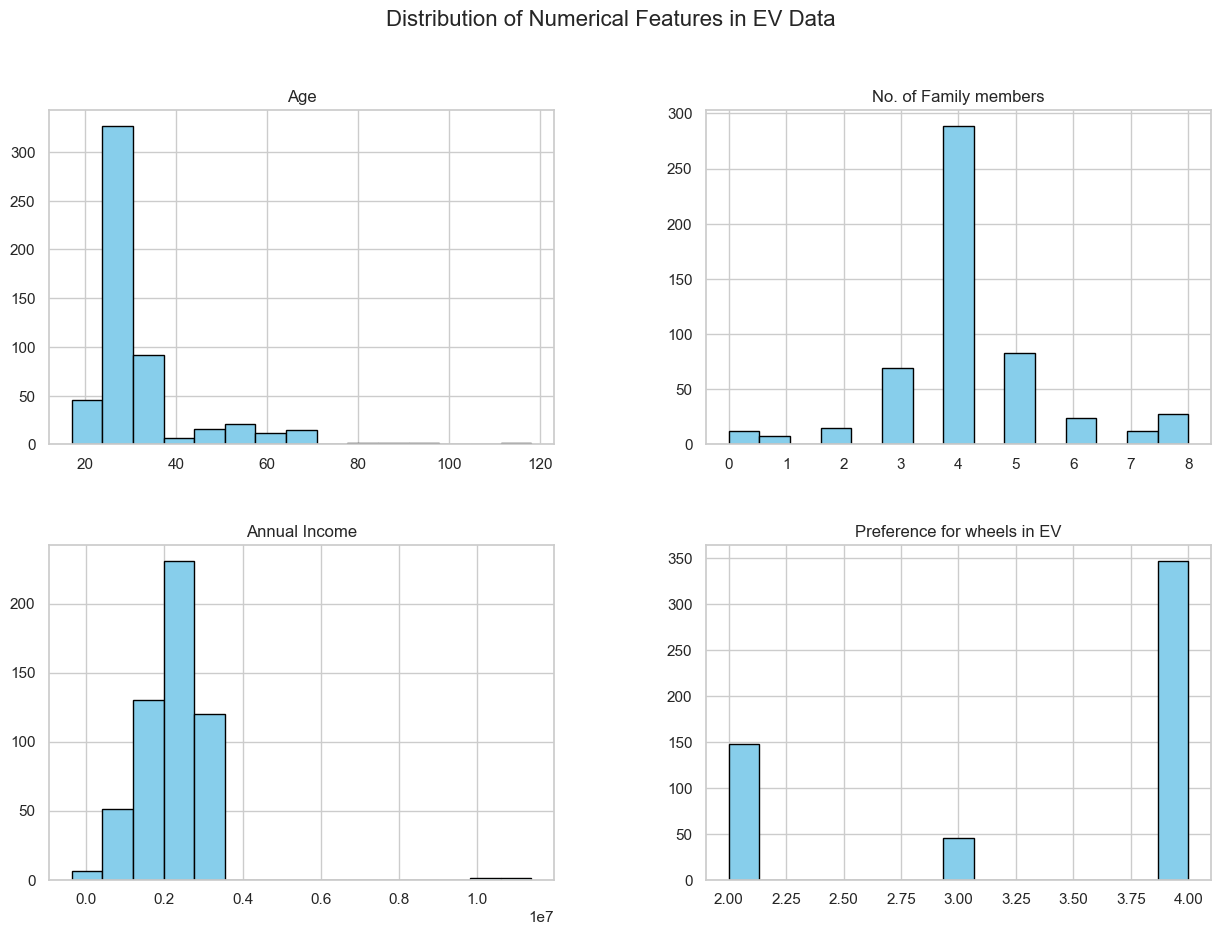

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for plots
sns.set(style="whitegrid")

# Create histograms for numerical features in the EV Data
df1.hist(bins=15, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Numerical Features in EV Data", fontsize=16)
plt.show()


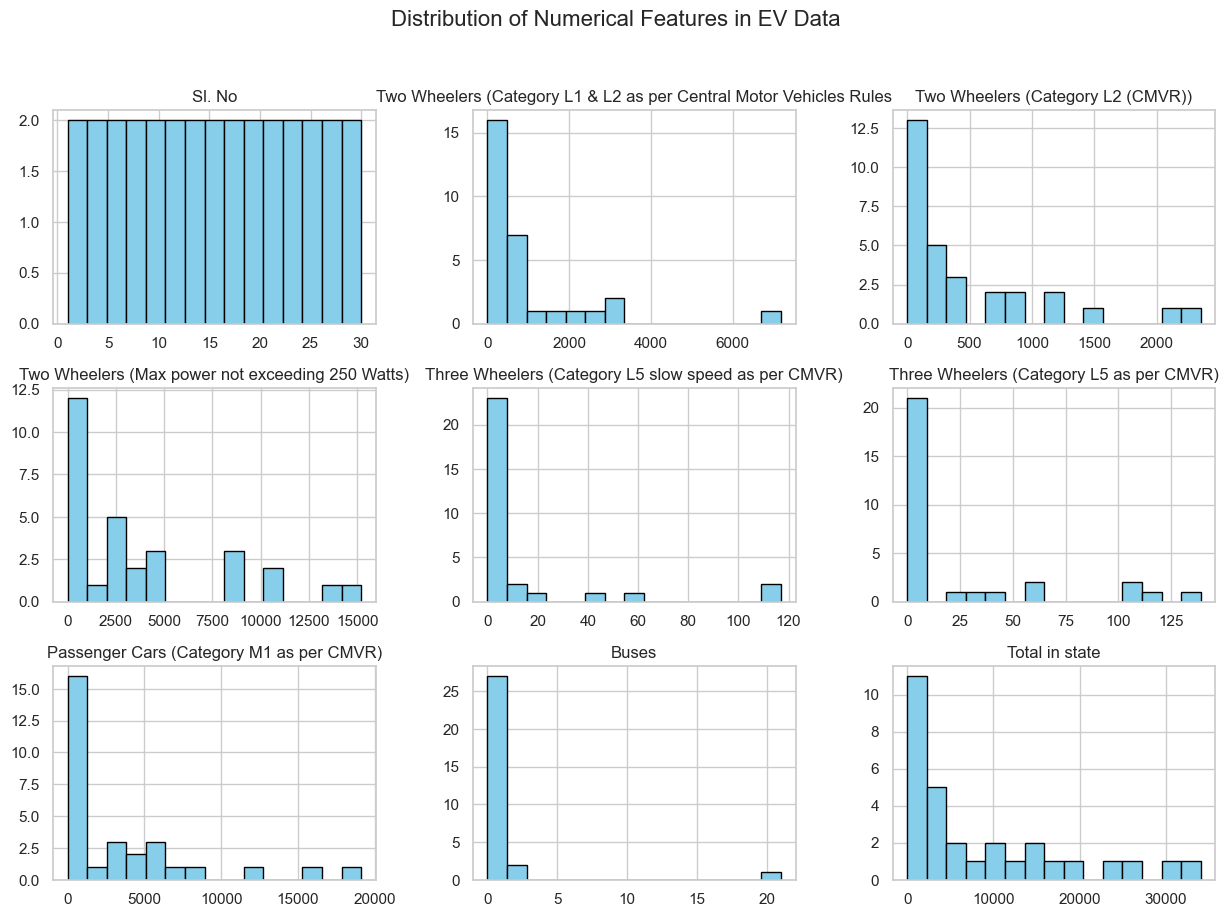

In [10]:
sns.set(style="whitegrid")

# Create histograms for numerical features in the EV Data
df2.hist(bins=15, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Numerical Features in EV Data", fontsize=16)
plt.show()

In [70]:

corrections = {
    'New Delhi': 'Delhi',
    'Hakdwani': 'Haldwani',
    'Bengaluru': 'Banglore',
    'pune': 'Pune',  # To correct cases like 'pUNE' or 'Pune '
    'pUNE': 'Puna'
}

# Strip extra spaces and replace incorrect names with the correct ones
df1['City'] = df1['City'].str.strip().replace(corrections)


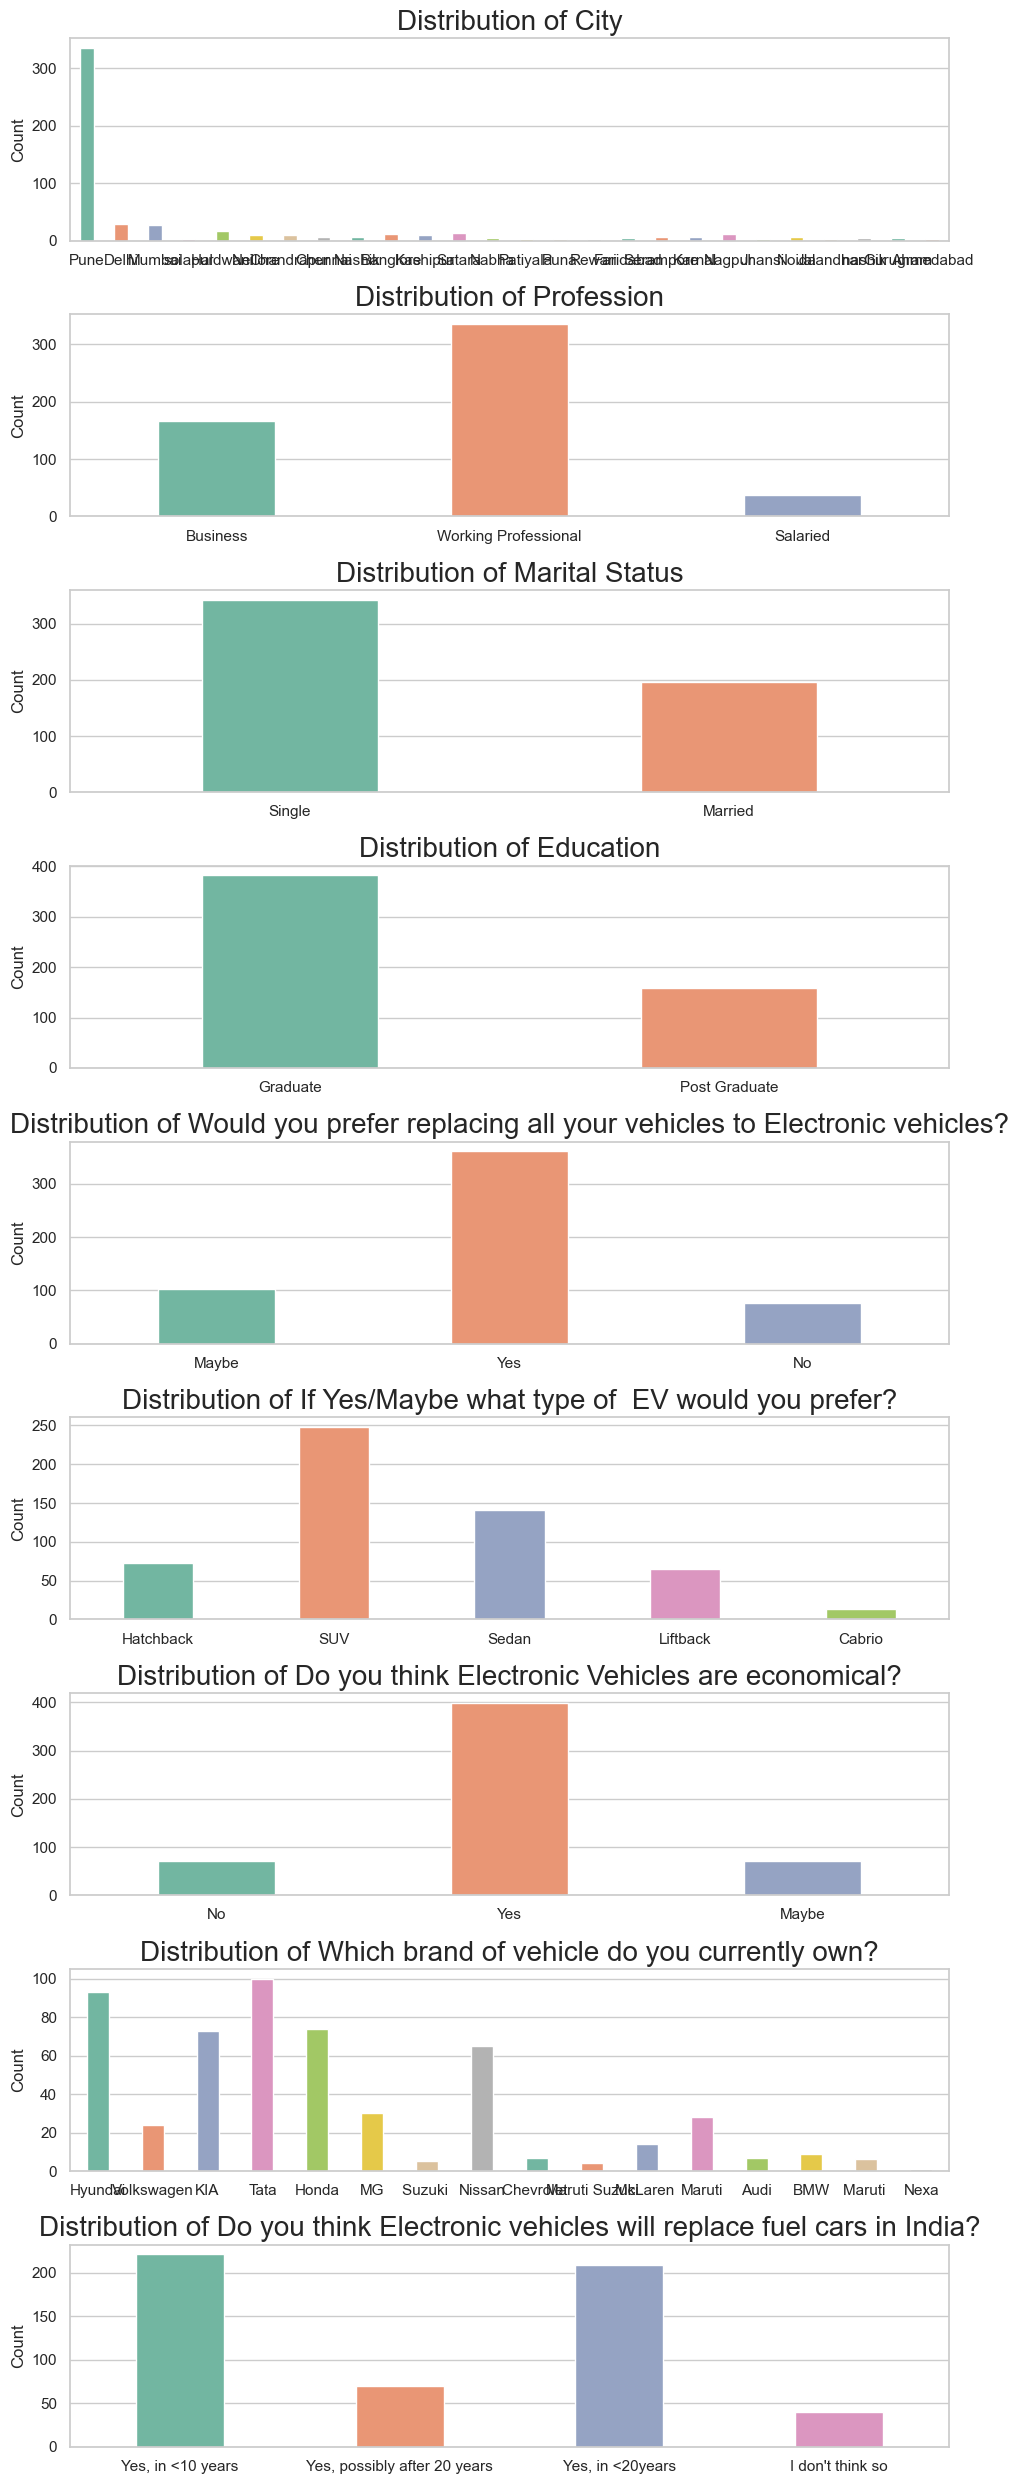

In [77]:
# Create bar charts for categorical features in the EV Data
import warnings
warnings.filterwarnings('ignore')
categorical_columns_ev = ['City', 'Profession', 'Marital Status', 'Education', 
                          'Would you prefer replacing all your vehicles to Electronic vehicles?', 
                          'If Yes/Maybe what type of  EV would you prefer?', 
                          'Do you think Electronic Vehicles are economical?', 
                          'Which brand of vehicle do you currently own?', 
                          'Do you think Electronic vehicles will replace fuel cars in India?']

fig, axes = plt.subplots(len(categorical_columns_ev), 1, figsize=(10, 25))
for i, col in enumerate(categorical_columns_ev):
    sns.countplot(data=df1, x=col, palette='Set2', ax=axes[i], width=0.4)
    axes[i].set_title(f'Distribution of {col}', fontsize=20)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()


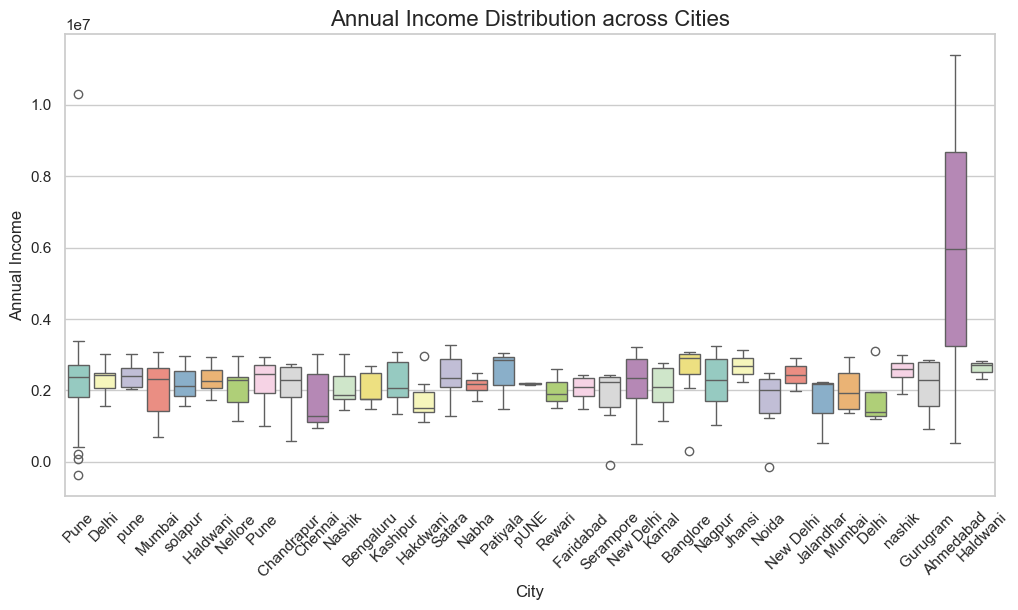

In [12]:
# Create box plots for how Annual Income varies across different Cities
plt.figure(figsize=(12, 6))
sns.boxplot(data=df1, x='City', y='Annual Income', palette='Set3')
plt.title("Annual Income Distribution across Cities", fontsize=16)
plt.xticks(rotation=45)
plt.show()


In [13]:
# Identify categorical columns
categorical_columns = df1.select_dtypes(include=['object']).columns

# Apply one-hot encoding to the categorical columns
df1_encoded = pd.get_dummies(df1, columns=categorical_columns, drop_first=True)




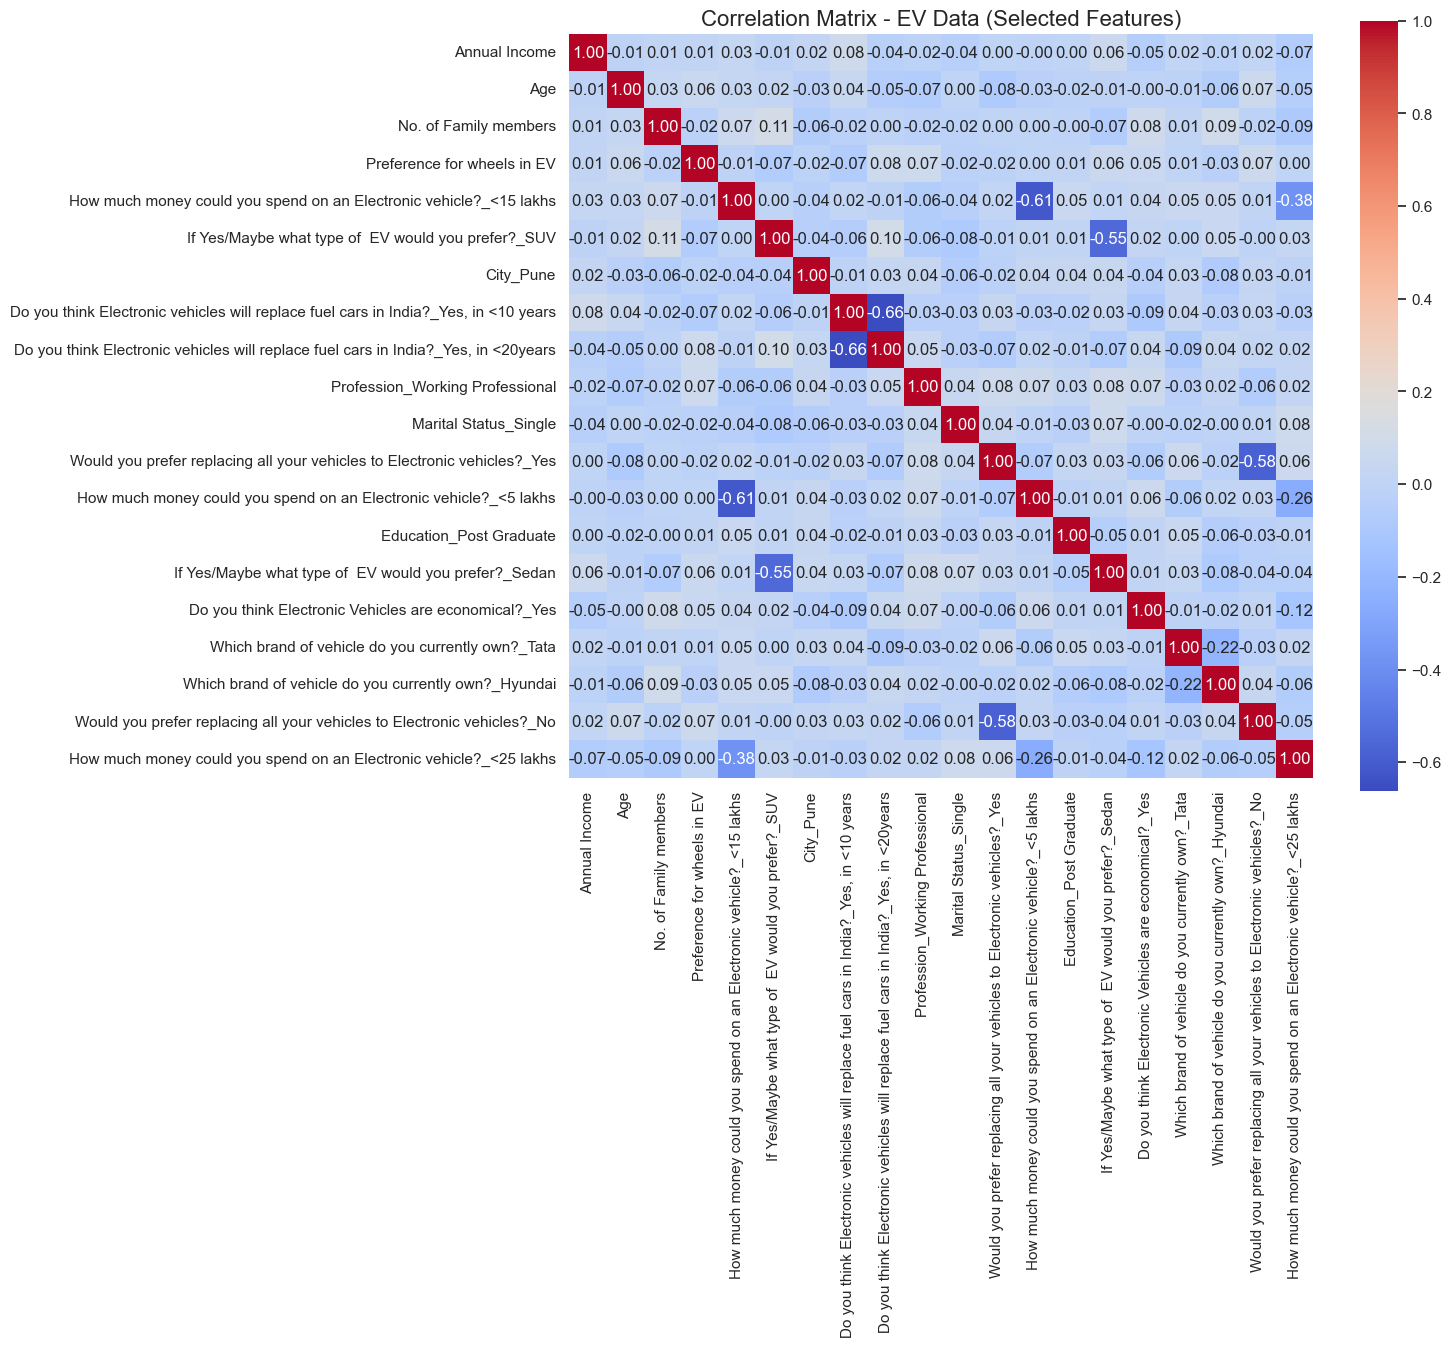

In [14]:
# Example: Selecting top N features based on variance or correlation
top_features = df1_encoded.var().nlargest(20).index  # Selecting top 20 features by variance
corr_matrix_df1= df1_encoded[top_features].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix_df1, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title("Correlation Matrix - EV Data (Selected Features)", fontsize=16)
plt.show()


In [15]:
categorical_columns_df2 = df2.select_dtypes(include=['object']).columns
df2_encoded = pd.get_dummies(df2, columns=categorical_columns_df2, drop_first=True)

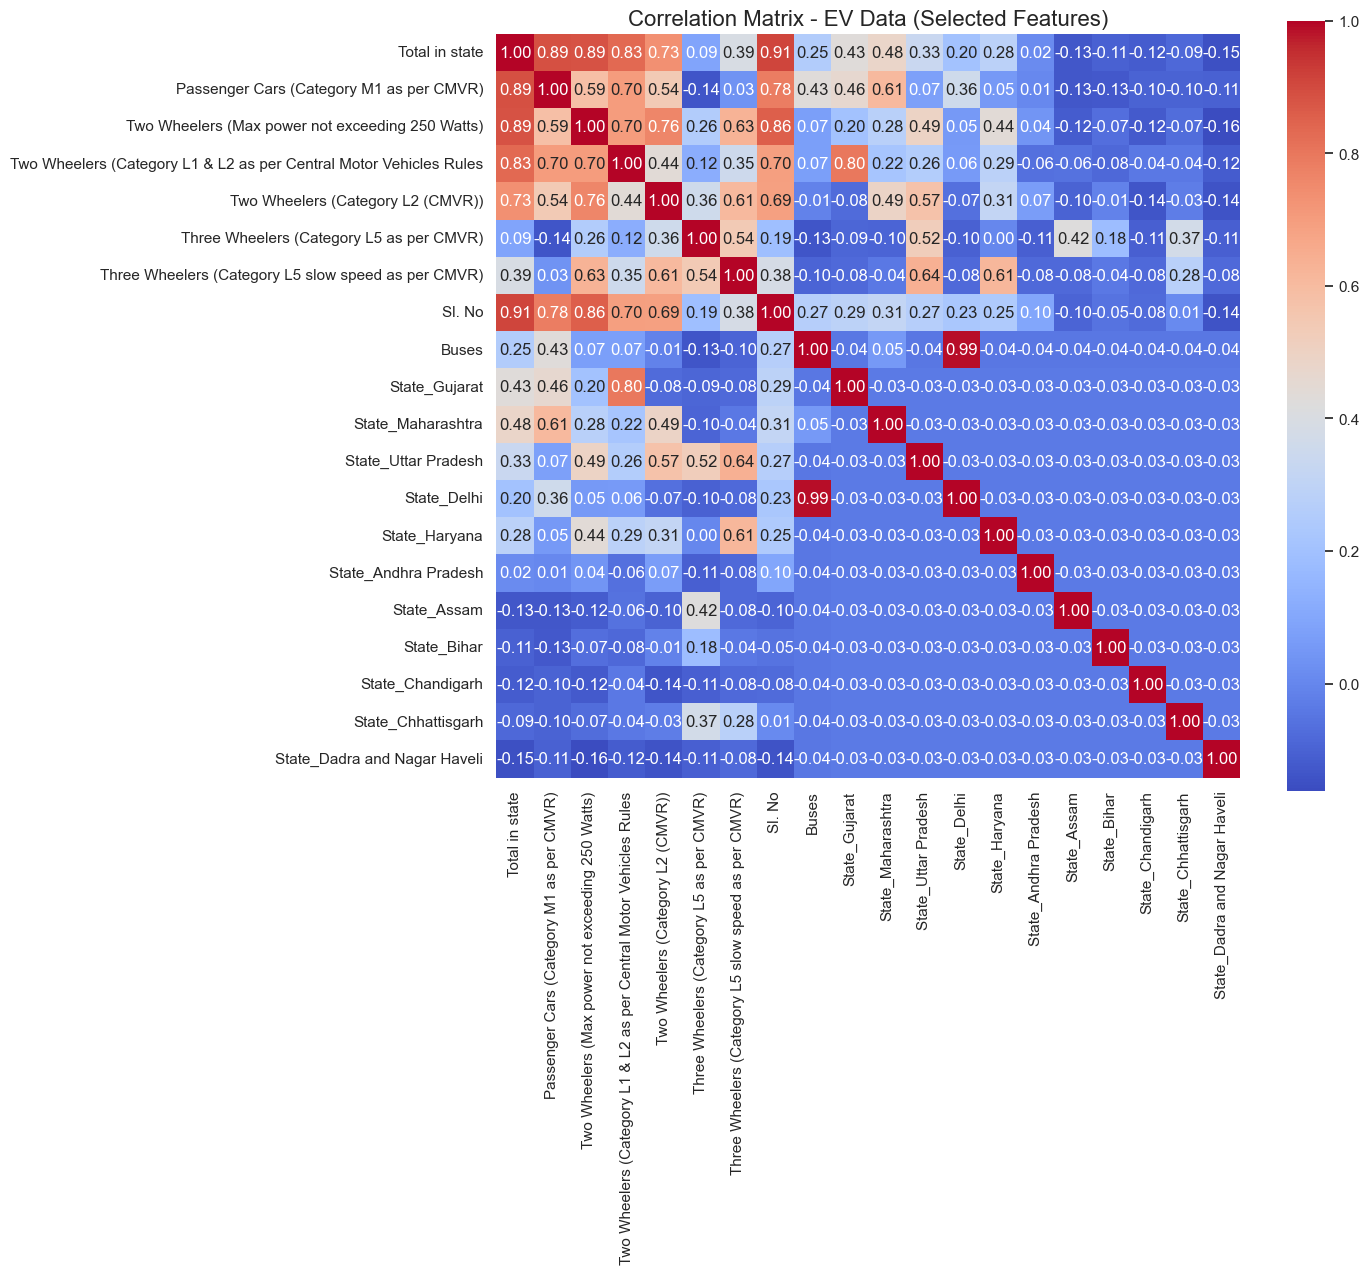

In [16]:
top_features = df2_encoded.var().nlargest(20).index  # Selecting top 20 features by variance
corr_matrix_df2 = df2_encoded[top_features].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix_df2, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title("Correlation Matrix - EV Data (Selected Features)", fontsize=16)
plt.show()


In [17]:
# Encoding the target variable in df1
df1['EV_Adoption_Likelihood'] = df1['Would you prefer replacing all your vehicles to Electronic vehicles?'].map({'Yes': 1, 'Maybe': 0.5, 'No': 0})

# Dropping the original column
df1.drop('Would you prefer replacing all your vehicles to Electronic vehicles?', axis=1, inplace=True)

# Displaying the first few rows to verify
print(df1[['City', 'Profession', 'Annual Income', 'EV_Adoption_Likelihood']].head())


     City            Profession  Annual Income  EV_Adoption_Likelihood
3    Pune              Business   2.832380e+06                     0.5
5    Pune  Working Professional   2.945694e+06                     0.5
6    Pune  Working Professional   2.686745e+06                     1.0
9    Pune  Working Professional   5.628716e+05                     1.0
10  Delhi  Working Professional   2.457488e+06                     1.0


In [18]:
import pandas as pd

# Apply One-Hot Encoding to the 'City' column
df1_encoded = pd.get_dummies(df1, columns=['City', "Marital Status", "Education", "Profession"], drop_first=True)

# Check the new column names to see the result
df1_encoded.head()
df1_encoded = df1_encoded.applymap(lambda x: 1 if x is True else 0 if x is False else x)

In [19]:
df1_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 540 entries, 3 to 999
Data columns (total 48 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   Age                                                                540 non-null    int64  
 1   No. of Family members                                              540 non-null    int64  
 2   Annual Income                                                      540 non-null    float64
 3   If Yes/Maybe what type of  EV would you prefer?                    540 non-null    object 
 4   Do you think Electronic Vehicles are economical?                   540 non-null    object 
 5   Which brand of vehicle do you currently own?                       540 non-null    object 
 6   How much money could you spend on an Electronic vehicle?           540 non-null    object 
 7   Preference for wheels in EV    

In [20]:

# Combine the two columns
df1_encoded['City_Delhi'] = df1_encoded['City_Delhi'] + df1_encoded['City_Delhi ']+ df1_encoded['City_New Delhi']+ df1_encoded['City_New Delhi ']

# Drop the 'City_Bengaluru' column
df1_encoded.drop(columns=['City_Delhi '], inplace=True)
df1_encoded.drop(columns=['City_New Delhi'], inplace=True)
df1_encoded.drop(columns=['City_New Delhi '], inplace=True)
# Combine the two columns
df1_encoded['City_Haldwani'] = df1_encoded['City_Haldwani'] + df1_encoded['City_Hakdwani']

# Drop the 'City_Bengaluru' column
df1_encoded.drop(columns=['City_Hakdwani'], inplace=True)
df1_encoded['City_Mumbai'] = df1_encoded['City_Mumbai'] + df1_encoded['City_Mumbai ']

# Drop the 'City_Bengaluru' column
df1_encoded.drop(columns=['City_Mumbai '], inplace=True)

df1_encoded['City_Pune'] = df1_encoded['City_Pune '] + df1_encoded['City_pune']+ df1_encoded['City_pUNE']+ df1_encoded['City_pune']
df1_encoded.drop(columns=['City_Pune '], inplace=True)
df1_encoded.drop(columns=['City_pune'], inplace=True)
df1_encoded.drop(columns=['City_pUNE'], inplace=True)


In [21]:
# Combine the two columns
df1_encoded['City_Banglore '] = df1_encoded['City_Banglore '] + df1_encoded['City_Bengaluru']

# Drop the 'City_Bengaluru' column
df1_encoded.drop(columns=['City_Bengaluru'], inplace=True)

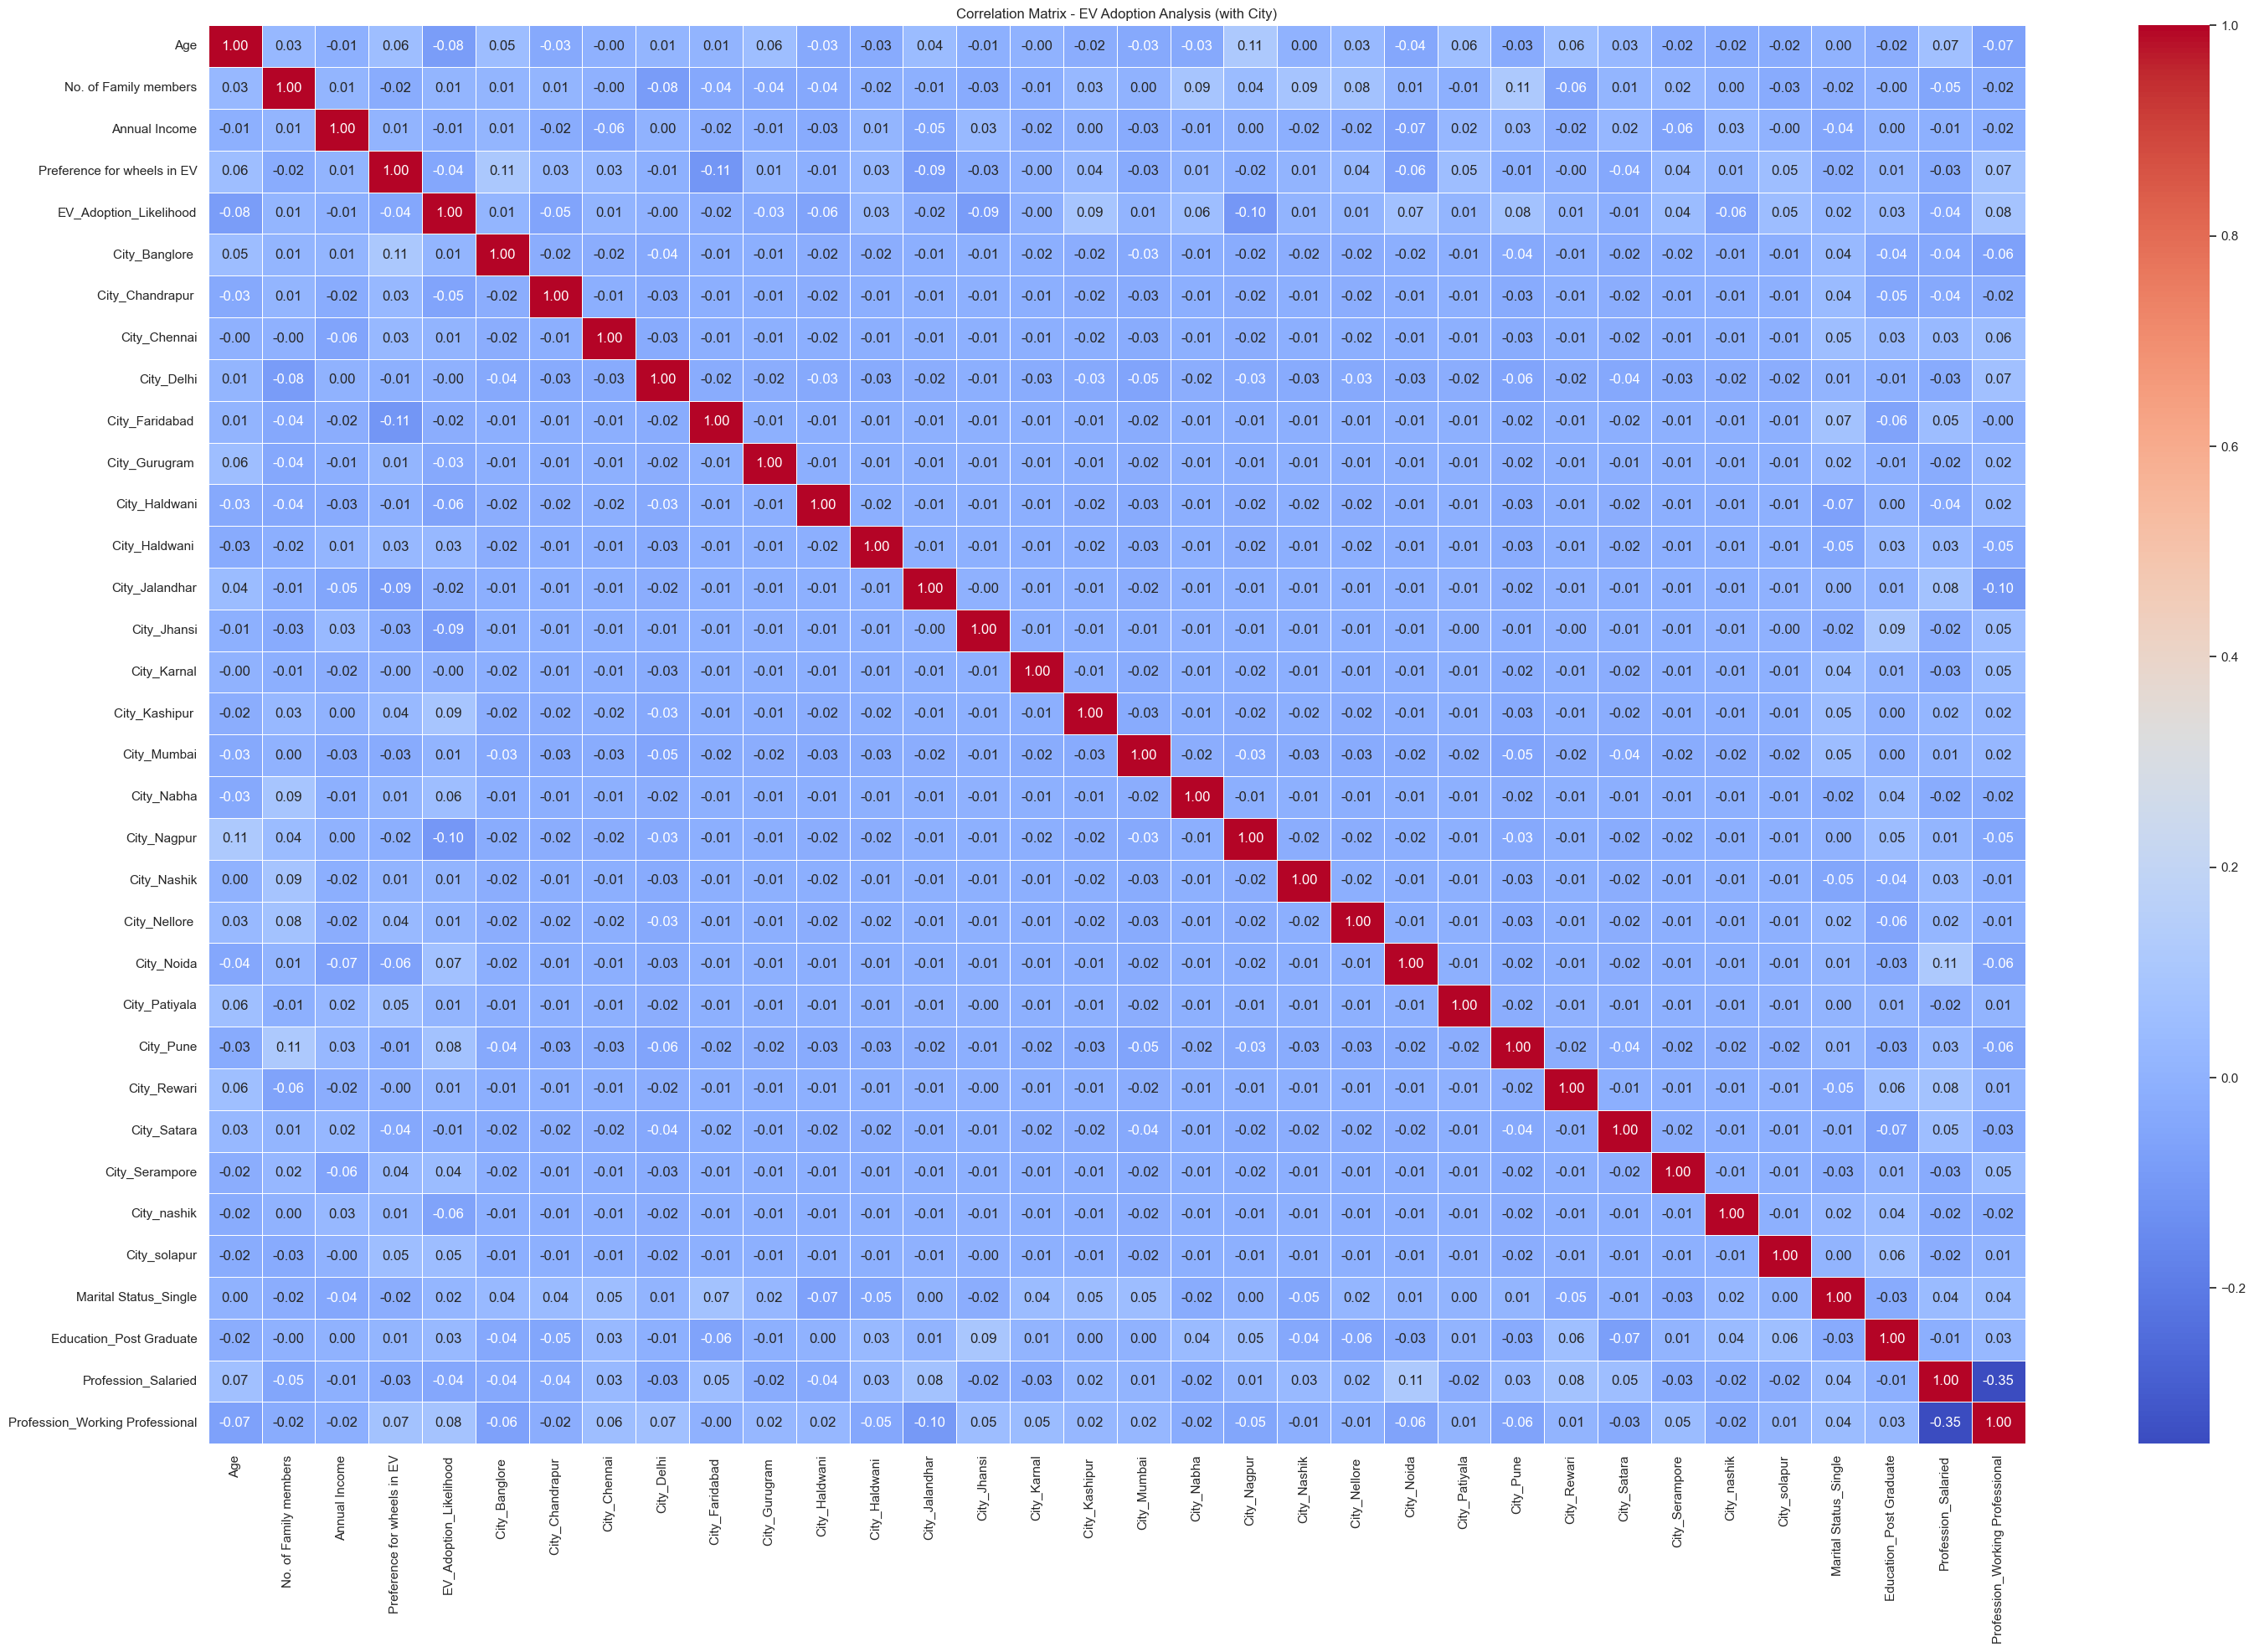

In [22]:
# Select only the numeric columns (which now includes the one-hot encoded 'City' columns)
numeric_df1_encoded = df1_encoded.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numeric_df1_encoded.corr()

# Visualize the correlation matrix
plt.figure(figsize=(35, 22))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix - EV Adoption Analysis (with City)')
plt.show()


In [23]:
df1_encoded.columns

Index(['Age', 'No. of Family members', 'Annual Income',
       'If Yes/Maybe what type of  EV would you prefer?',
       'Do you think Electronic Vehicles are economical?',
       'Which brand of vehicle do you currently own?',
       'How much money could you spend on an Electronic vehicle?',
       'Preference for wheels in EV',
       'Do you think Electronic vehicles will replace fuel cars in India?',
       'EV_Adoption_Likelihood', 'City_Banglore ', 'City_Chandrapur ',
       'City_Chennai', 'City_Delhi', 'City_Faridabad ', 'City_Gurugram ',
       'City_Haldwani', 'City_Haldwani ', 'City_Jalandhar', 'City_Jhansi',
       'City_Karnal', 'City_Kashipur ', 'City_Mumbai', 'City_Nabha',
       'City_Nagpur', 'City_Nashik', 'City_Nellore ', 'City_Noida',
       'City_Patiyala', 'City_Pune', 'City_Rewari', 'City_Satara',
       'City_Serampore', 'City_nashik', 'City_solapur',
       'Marital Status_Single', 'Education_Post Graduate',
       'Profession_Salaried', 'Profession_Working Pr

In [24]:
from sklearn.preprocessing import StandardScaler

# Select the features based on correlation matrix analysis
selected_features = numeric_df1_encoded[['Age', 'Annual Income', 'No. of Family members', 'Preference for wheels in EV','City_Banglore ','City_Mumbai','City_Delhi','City_Pune','Profession_Working Professional','City_Noida']]  # Replace with your chosen features

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(selected_features)


## Apply K-Means clustering to segment the market. Start by determining the optimal number of clusters using the Elbow Method.

In [25]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns


In [26]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(selected_features)


In [81]:
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)


In [82]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(pca_features)

# Add the cluster labels to the original dataset
df1['Cluster'] = clusters


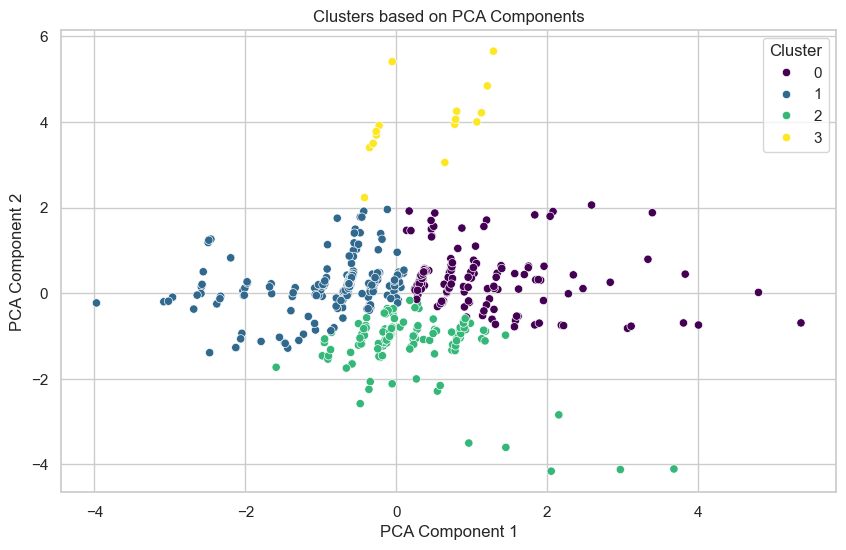

In [84]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=df1['Cluster'], palette='viridis')
plt.title('Clusters based on PCA Components')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


In [30]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(pca_features, df1['Cluster'])
print(f'Silhouette Score after PCA: {silhouette_avg}')


Silhouette Score after PCA: 0.3798447880884209


## Determine the Optimal Number of Components:

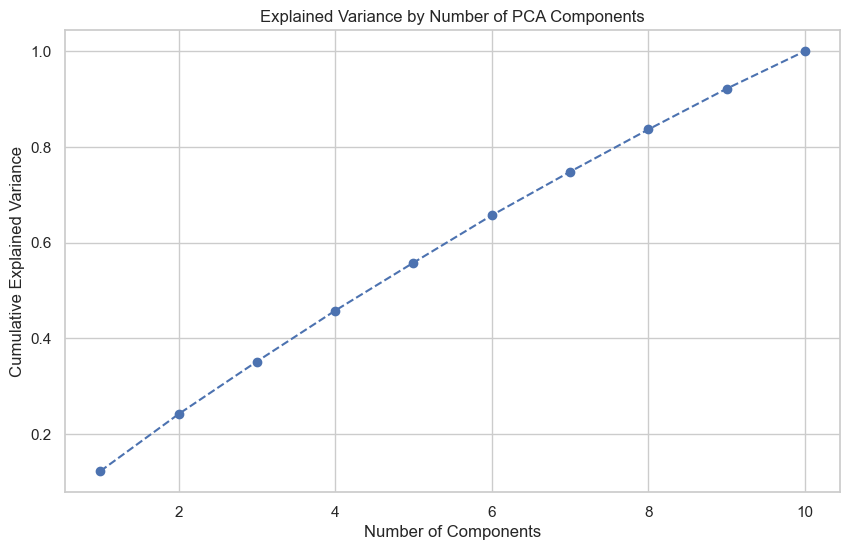

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Initialize PCA
pca = PCA().fit(scaled_features)

# Calculate cumulative variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot cumulative variance to determine the number of components
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Explained Variance by Number of PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()


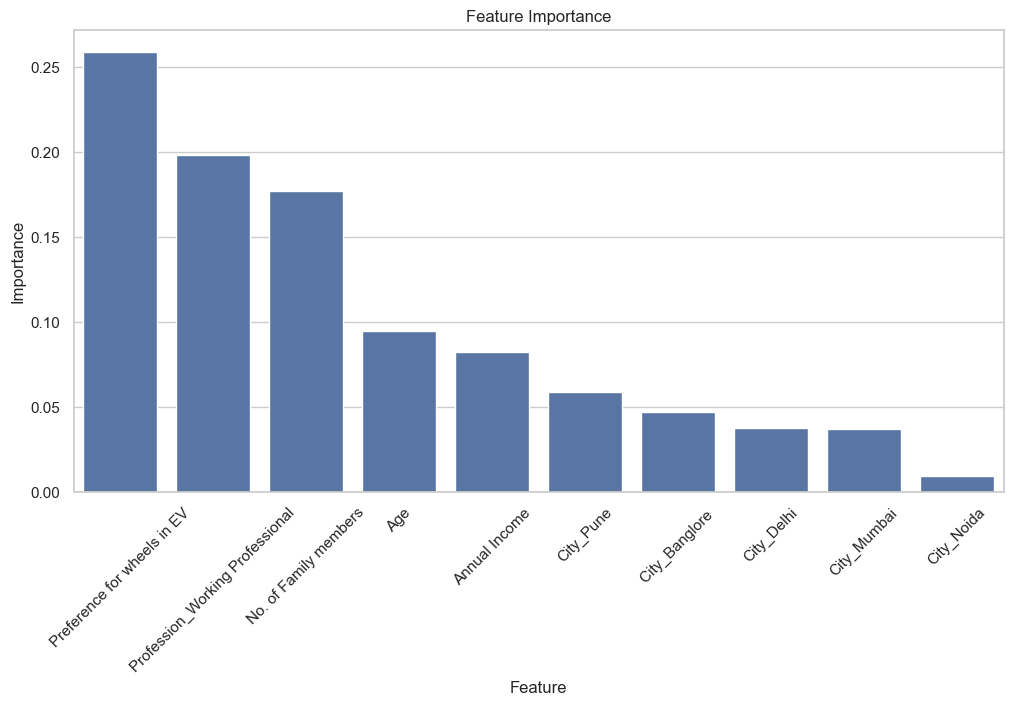

In [32]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(scaled_features, clusters)

importances = rf.feature_importances_
feature_names = selected_features.columns

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)

# Plot feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x='Feature', y='Importance', data=feature_importance_df)
plt.title('Feature Importance')
plt.xticks(rotation=45)
plt.show()


In [33]:
# Assuming 5 components explain 90% variance
pca = PCA(n_components=1)
pca_features = pca.fit_transform(scaled_features)
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Apply K-Means clustering
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(pca_features)

# Calculate Silhouette Score
silhouette_avg = silhouette_score(pca_features, clusters)
print(f'Silhouette Score with {pca.n_components_} PCA components: {silhouette_avg}')


Silhouette Score with 1 PCA components: 0.607792173155235


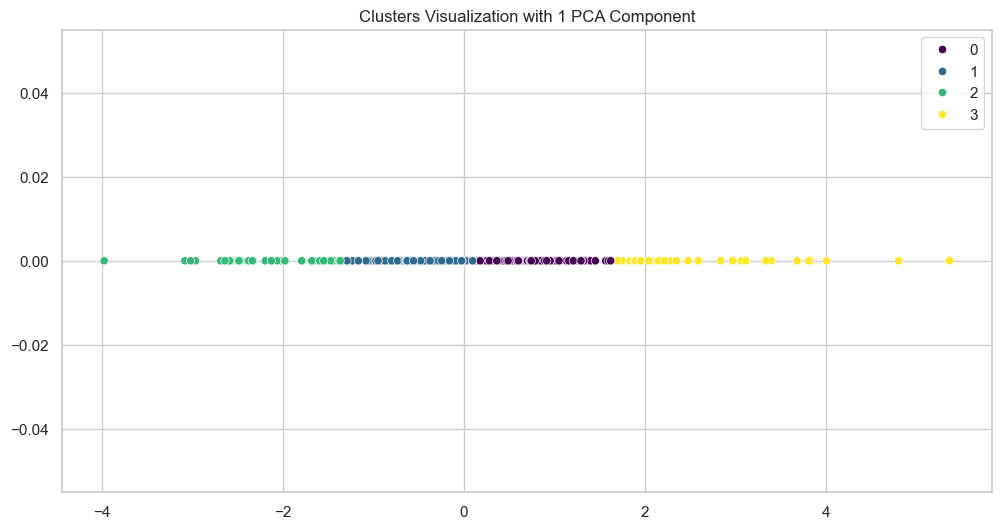

In [34]:
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.scatterplot(x=pca_features[:, 0], y=[0]*len(pca_features), hue=kmeans.labels_, palette='viridis')
plt.title('Clusters Visualization with 1 PCA Component')
plt.show()


In [35]:
# Add the cluster labels to the original dataframe
numeric_df1_encoded['Cluster'] = kmeans.labels_

# Group the data by clusters and calculate the mean for each feature
cluster_profile = numeric_df1_encoded.groupby('Cluster').mean()
cluster_profile



,Age,No. of Family members,Annual Income,Preference for wheels in EV,EV_Adoption_Likelihood,City_Banglore,City_Chandrapur,City_Chennai,City_Delhi,City_Faridabad,...,City_Pune,City_Rewari,City_Satara,City_Serampore,City_nashik,City_solapur,Marital Status_Single,Education_Post Graduate,Profession_Salaried,Profession_Working Professional
Cluster,,,,,,,,,,,,,,,,,,,,,
0,32.887097,4.677419,2.217767e+06,3.166667,0.752688,0.037634,0.021505,0.005376,0.000000,0.016129,...,0.059140,0.000000,0.026882,0.010753,0.005376,0.005376,0.645161,0.290323,0.145161,0.236559
1,31.240143,3.874552,2.173002e+06,3.512545,0.761649,0.017921,0.017921,0.021505,0.003584,0.003584,...,0.003584,0.010753,0.021505,0.010753,0.010753,0.003584,0.634409,0.318996,0.017921,0.896057
2,31.095238,2.690476,2.227144e+06,3.500000,0.761905,0.000000,0.000000,0.000000,0.666667,0.023810,...,0.000000,0.000000,0.023810,0.023810,0.000000,0.023810,0.642857,0.214286,0.023810,0.857143
3,32.090909,6.181818,2.399538e+06,3.121212,0.833333,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.787879,0.000000,0.030303,0.000000,0.000000,0.000000,0.575758,0.181818,0.121212,0.181818


In [50]:
cluster_profile["City_Mumbai"]

Cluster
0    0.043011
1    0.064516
2    0.023810
3    0.000000
Name: City_Mumbai, dtype: float64

In [49]:
cluster_profile.to_csv('clusters.csv')


In [47]:
import requests
import pandas as pd
API_KEY= 'b8728b437e7f7e28d669edc2103d3b19'
# Write your code here
B_URL='https://api.themoviedb.org/3'
def get_movie_id(api_key, movie_name):
    search_url = f'{B_URL}/search/movie'
    params = {
        'api_key': api_key,
        'query': movie_name
    }
    response = requests.get(search_url, params=params)
    data = response.json()
    df=pd.DataFrame(data)
    print(df)
    if data['results']:
        movie_id = data['results'][0]['id']
        return movie_id
    else:
        return None
m='Andhadhun'
movie_id = get_movie_id(API_KEY,m )
if movie_id:
    print(f'The ID of the movie is {movie_id}.')
else:
    print(f'Movie "{MOVIE_NAME}" not found.')

AttributeError: module 'pandas' has no attribute 'read_json_file'